## Task 2 : Clasification of emotion of videos into happy,  sad,  angry and neutral
## Violent and Non-Violent videos

We are using the labels provided by the ACCEDEviolence dataset for violence and non-violence and then applying it separately on ACCEDEfeaturesArousal_TAC2015 and ACCEDEfeaturesValence_TAC2015 and checking accuracy.

We need to classify the video as violent and non-violent based on the features extracted.


In [2]:
#import files
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, auc, precision_recall_curve, accuracy_score, f1_score, confusion_matrix, average_precision_score
from sklearn.base import clone
import pickle
from sklearn import tree
from sklearn.metrics import accuracy_score

C:\Users\Nivedita Prasad\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Read all the csv files and Familirization

In [3]:
#read arousal
featuresArousal_TAC2015 = pd.read_csv('ACCEDEfeaturesArousal_TAC2015.csv')
featuresArousal_TAC2015_temp =featuresArousal_TAC2015.drop('id',axis=1)
featuresArousal_TAC2015_temp = featuresArousal_TAC2015_temp.drop('name' ,axis=1)

In [15]:
#read valance
featuresValence_TAC2015 = pd.read_csv('ACCEDEfeaturesValence_TAC2015.csv')
featuresValence_TAC2015_temp =featuresValence_TAC2015.drop('id',axis=1)
featuresValence_TAC2015_temp = featuresValence_TAC2015_temp.drop('name' ,axis=1)

In [16]:
#read both features
VA_features_2015 = pd.read_csv('VA_features_2015.csv')

In [5]:
#read ACCEDEviolence - labels
ACCEDEviolence = pd.read_csv('ACCEDEviolence.csv')
ACCEDEviolence_temp =ACCEDEviolence.drop('id',axis=1)
ACCEDEviolence_temp = ACCEDEviolence_temp.drop('name' ,axis=1)
ACCEDEviolence_temp.head()

,violence
0,0
1,0
2,0
3,0
4,0


In [6]:
ACCEDEviolence_temp.violence.value_counts()
#0    9360
#1     440

0    9360
1     440
Name: violence, dtype: int64

### Classification using both features of valence and arousal

In [ ]:
labels = ACCEDEviolence_temp.violence
## convert to numpy array
labels = np.array(labels)

In [17]:
## create train test split
print ("Splitting train and test dataset")
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(VA_features_2015, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

## apply SMOTE to the training set
print ("Applying SMOTE to the training set to balance violent and non-violent classes")
intended_ratio = 0.3
original_num_non_violent = len([x for x in y_train_fa if x == 0])
sm = SMOTE(random_state=12, ratio={1:int(intended_ratio * original_num_non_violent)})
X_train_res, y_train_res = sm.fit_sample(X_train_fa, y_train_fa)


Splitting train and test dataset
Applying SMOTE to the training set to balance violent and non-violent classes


In [18]:
## create classifiers
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(C=500, penalty='l1', random_state=12)
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=10, random_state=12)

## create dictionary to store values
clf_dict = {"knn": {"clf": knn}, "lr": {"clf": lr}, "rf": {"clf": rf}}


Benchmark between classifiers..
KNN
Without SMOTE
Precision:  0.3958333333333333
Recall:  0.10795454545454546
F1 Score:  0.16964285714285715
AUC:  0.6363560484654235
With SMOTE
Precision:  0.16028708133971292
Recall:  0.3806818181818182
F1 Score:  0.22558922558922556
AUC:  0.6759034151612276

LR
Without SMOTE
Precision:  0.1
Recall:  0.005681818181818182
F1 Score:  0.010752688172043012
AUC:  0.7380171911421911
With SMOTE
Precision:  0.17333333333333334
Recall:  0.2215909090909091
F1 Score:  0.19451371571072318
AUC:  0.7483276272338771

RF
Without SMOTE
Precision:  0.5
Recall:  0.005681818181818182
F1 Score:  0.011235955056179775
AUC:  0.7982742084304584
With SMOTE
Precision:  0.4861111111111111
Recall:  0.19886363636363635
F1 Score:  0.28225806451612906
AUC:  0.8162332459207458

Plotting the ROCs..


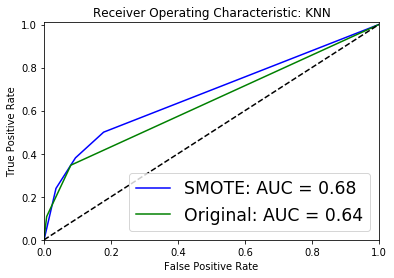

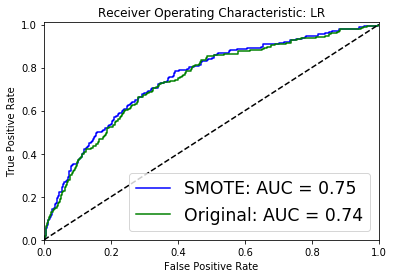

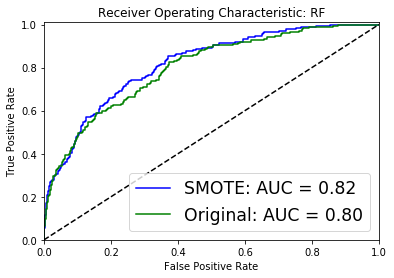

In [19]:
print ("Benchmark between classifiers..")
for k,v in clf_dict.items():
    ## train using original dataset
    print (k.upper())
    print ("Without SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_fa, y_train_fa)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['non-smote'] = {}
    v['non-smote']['fpr'] = fpr
    v['non-smote']['tpr'] = tpr
    v['non-smote']['thresholds'] = thresholds
    v['non-smote']['auc'] = auc_score
    v['non-smote']['recall'] = recall
    v['non-smote']['precision'] = precision
    ## train using SMOTE
    print ("With SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_res, y_train_res)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['smote'] = {}
    v['smote']['fpr'] = fpr
    v['smote']['tpr'] = tpr
    v['smote']['thresholds'] = thresholds
    v['smote']['auc'] = auc_score
    v['smote']['recall'] = recall
    v['smote']['precision'] = precision
    print ("")

## save the result to a pickle file    
# if it's already there uncoment the following two lines
# with open('imbalance_task_result.pickle', 'rb') as handle:
#    clf_dict = pickle.load(handle)
with open('imbalance_task_result.pickle', 'wb') as handle:
    pickle.dump(clf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# plot the ROCs
print ("Plotting the ROCs..")
for k in clf_dict.keys():
    plt.title('Receiver Operating Characteristic: ' + k.upper())

    plt.plot(clf_dict[k]['smote']['fpr'], clf_dict[k]['smote']['tpr'], 'b',label='SMOTE: AUC = %0.2f'% clf_dict[k]['smote']['auc'])
    plt.plot(clf_dict[k]['non-smote']['fpr'], clf_dict[k]['non-smote']['tpr'], 'g',label='Original: AUC = %0.2f'% clf_dict[k]['non-smote']['auc'])

    plt.legend(loc='lower right', fontsize="xx-large")
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()




### Classification using features of arousal

In [7]:
labels = ACCEDEviolence_temp.violence
## convert to numpy array
labels = np.array(labels)

In [8]:
## create train test split
print ("Splitting train and test dataset")
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(featuresArousal_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

## apply SMOTE to the training set
print ("Applying SMOTE to the training set to balance violent and non-violent classes")
intended_ratio = 0.3
original_num_non_violent = len([x for x in y_train_fa if x == 0])
sm = SMOTE(random_state=12, ratio={1:int(intended_ratio * original_num_non_violent)})
X_train_res, y_train_res = sm.fit_sample(X_train_fa, y_train_fa)


Splitting train and test dataset
Applying SMOTE to the training set to balance violent and non-violent classes


In [9]:
## create classifiers
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(C=500, penalty='l1', random_state=12)
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=10, random_state=12)

## create dictionary to store values
clf_dict = {"knn": {"clf": knn}, "lr": {"clf": lr}, "rf": {"clf": rf}}


Benchmark between classifiers..
KNN
Without SMOTE
Precision:  0.36538461538461536
Recall:  0.10795454545454546
F1 Score:  0.16666666666666666
AUC:  0.646547354555167
With SMOTE
Precision:  0.16876574307304787
Recall:  0.3806818181818182
F1 Score:  0.2338568935427574
AUC:  0.6724425747863249

LR
Without SMOTE
Precision:  0.14285714285714285
Recall:  0.005681818181818182
F1 Score:  0.01092896174863388
AUC:  0.7473654817404818
With SMOTE
Precision:  0.1693121693121693
Recall:  0.18181818181818182
F1 Score:  0.17534246575342466
AUC:  0.7542143186674436

RF
Without SMOTE
Precision:  1.0
Recall:  0.005681818181818182
F1 Score:  0.01129943502824859
AUC:  0.7878226374320125
With SMOTE
Precision:  0.46153846153846156
Recall:  0.17045454545454544
F1 Score:  0.24896265560165975
AUC:  0.8199558687839937

Plotting the ROCs..


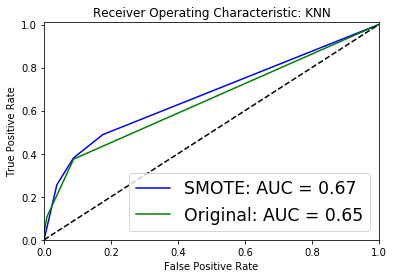

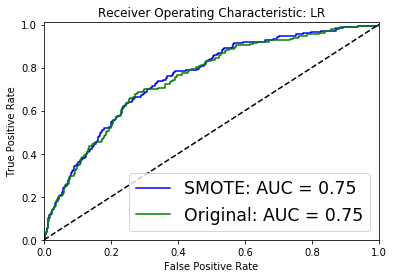

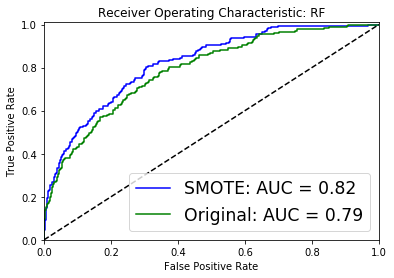

In [10]:
print ("Benchmark between classifiers..")
for k,v in clf_dict.items():
    ## train using original dataset
    print (k.upper())
    print ("Without SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_fa, y_train_fa)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['non-smote'] = {}
    v['non-smote']['fpr'] = fpr
    v['non-smote']['tpr'] = tpr
    v['non-smote']['thresholds'] = thresholds
    v['non-smote']['auc'] = auc_score
    v['non-smote']['recall'] = recall
    v['non-smote']['precision'] = precision
    ## train using SMOTE
    print ("With SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_res, y_train_res)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['smote'] = {}
    v['smote']['fpr'] = fpr
    v['smote']['tpr'] = tpr
    v['smote']['thresholds'] = thresholds
    v['smote']['auc'] = auc_score
    v['smote']['recall'] = recall
    v['smote']['precision'] = precision
    print ("")

## save the result to a pickle file    
# if it's already there uncoment the following two lines
# with open('imbalance_task_result.pickle', 'rb') as handle:
#    clf_dict = pickle.load(handle)
with open('imbalance_task_result.pickle', 'wb') as handle:
    pickle.dump(clf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# plot the ROCs
print ("Plotting the ROCs..")
for k in clf_dict.keys():
    plt.title('Receiver Operating Characteristic: ' + k.upper())

    plt.plot(clf_dict[k]['smote']['fpr'], clf_dict[k]['smote']['tpr'], 'b',label='SMOTE: AUC = %0.2f'% clf_dict[k]['smote']['auc'])
    plt.plot(clf_dict[k]['non-smote']['fpr'], clf_dict[k]['non-smote']['tpr'], 'g',label='Original: AUC = %0.2f'% clf_dict[k]['non-smote']['auc'])

    plt.legend(loc='lower right', fontsize="xx-large")
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()





### Classification for features using Valence

In [11]:
labels = ACCEDEviolence_temp.violence
## convert to numpy array
labels = np.array(labels)

In [12]:
## create train test split
print ("Splitting train and test dataset")
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(featuresValence_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

## apply SMOTE to the training set
print ("Applying SMOTE to the training set to balance violent and non-violent classes")
intended_ratio = 0.3
original_num_non_violent = len([x for x in y_train_fa if x == 0])
sm = SMOTE(random_state=12, ratio={1:int(intended_ratio * original_num_non_violent)})
X_train_res, y_train_res = sm.fit_sample(X_train_fa, y_train_fa)

Splitting train and test dataset
Applying SMOTE to the training set to balance violent and non-violent classes


In [13]:
## create classifiers
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(C=500, penalty='l1', random_state=12)
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=10, random_state=12)

## create dictionary to store values
clf_dict = {"knn": {"clf": knn}, "lr": {"clf": lr}, "rf": {"clf": rf}}


Benchmark between classifiers..
KNN
Without SMOTE
Precision:  0.39473684210526316
Recall:  0.08522727272727272
F1 Score:  0.14018691588785046
AUC:  0.5939199689199689
With SMOTE
Precision:  0.11764705882352941
Recall:  0.2727272727272727
F1 Score:  0.1643835616438356
AUC:  0.6139945124320124

LR
Without SMOTE
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
AUC:  0.6633720012626263
With SMOTE
Precision:  0.15789473684210525
Recall:  0.13636363636363635
F1 Score:  0.14634146341463414
AUC:  0.6708916083916083

RF
Without SMOTE
Precision:  0.3333333333333333
Recall:  0.011363636363636364
F1 Score:  0.02197802197802198
AUC:  0.755649949009324
With SMOTE
Precision:  0.49056603773584906
Recall:  0.14772727272727273
F1 Score:  0.22707423580786026
AUC:  0.760870422979798

Plotting the ROCs..


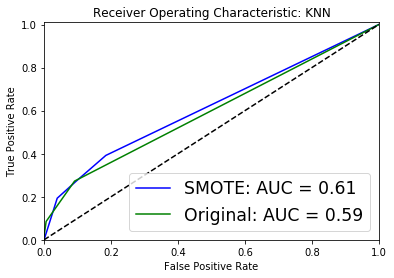

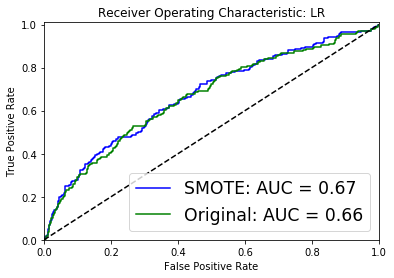

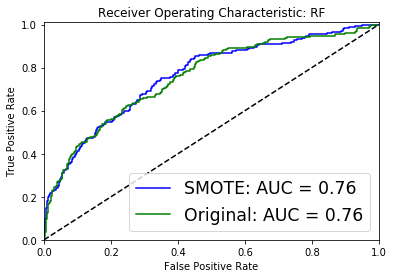

In [14]:
print ("Benchmark between classifiers..")
for k,v in clf_dict.items():
    ## train using original dataset
    print (k.upper())
    print ("Without SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_fa, y_train_fa)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['non-smote'] = {}
    v['non-smote']['fpr'] = fpr
    v['non-smote']['tpr'] = tpr
    v['non-smote']['thresholds'] = thresholds
    v['non-smote']['auc'] = auc_score
    v['non-smote']['recall'] = recall
    v['non-smote']['precision'] = precision
    ## train using SMOTE
    print ("With SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_res, y_train_res)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['smote'] = {}
    v['smote']['fpr'] = fpr
    v['smote']['tpr'] = tpr
    v['smote']['thresholds'] = thresholds
    v['smote']['auc'] = auc_score
    v['smote']['recall'] = recall
    v['smote']['precision'] = precision
    print ("")

## save the result to a pickle file    
# if it's already there uncoment the following two lines
# with open('imbalance_task_result.pickle', 'rb') as handle:
#    clf_dict = pickle.load(handle)
with open('imbalance_task_result.pickle', 'wb') as handle:
    pickle.dump(clf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# plot the ROCs
print ("Plotting the ROCs..")
for k in clf_dict.keys():
    plt.title('Receiver Operating Characteristic: ' + k.upper())

    plt.plot(clf_dict[k]['smote']['fpr'], clf_dict[k]['smote']['tpr'], 'b',label='SMOTE: AUC = %0.2f'% clf_dict[k]['smote']['auc'])
    plt.plot(clf_dict[k]['non-smote']['fpr'], clf_dict[k]['non-smote']['tpr'], 'g',label='Original: AUC = %0.2f'% clf_dict[k]['non-smote']['auc'])

    plt.legend(loc='lower right', fontsize="xx-large")
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


